# **HW2 for Fuzzy System** 

> Instructor: Dr. Hao Ying     
> **Solutions given by Yuqi Wang**   
> Email: he1173@wayne.edu     
> Date: 02.04.2022   

## Descriptions
- Source codes will be uploaded and updated to [Github repo](https://github.com/BoomAmplifier/Fuzzy_HW).     
- *Matlab* is licenced by WSU.    
- *Jupyter Notebook* and *python3* are also used in the document.

## Solutions  
   
#### Problem 1 (Ch3-1):   
Apply the extension principle to derive the MF of the fuzzy set B in Example 3.2 ( Figure 3.2).

**Solution:**    
Refer to Example 3.2:     
$$\mu_A(x)=\text{bell}(x;1.5,2,0.5)$$
$$\begin{equation}
f(x)=
\left\{
\begin{array}{c}
(x-1)^2 -1, &\text{if } x\geq 0 \\
x,  &\text{if } x\leq 0
\end{array}
\right.
\end{equation}
$$

According to extension principle, we have
$$\begin{equation}
\mu_B(y) = 
\left\{
\begin{array}{lCl}
\text{bell}((x-1)^2 -1;1.5,2,0.5), &\text{if } y\geq 0 &\Rightarrow x\geq 2 \\
max \left\{\text{bell}\left((x-1)^2 -1;1.5,2,0.5\right)|_{0 \leq x\leq 2}, \text{bell}(x;1.5,2,0.5)|_{-1 \leq x\leq 0} \right\}, &\text{if } -1 \leq y\leq 0 &\Rightarrow -1\leq x\leq 2 \\
\text{bell}(x;1.5,2,0.5), &\text{if } y\leq -1 &\Rightarrow x\leq -1
\end{array}
\right.
\end{equation}$$

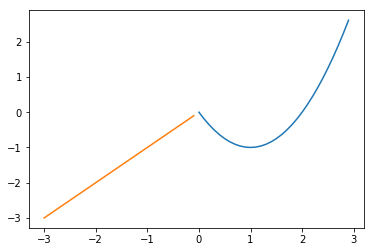

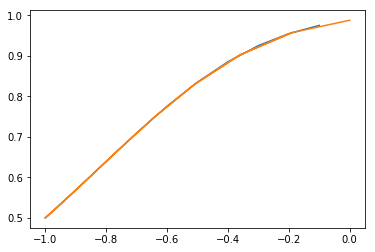

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import random
import skfuzzy as fuzz
%matplotlib inline

x_p = np.arange(0,3,0.1)
x_n = np.arange(-3,0,0.1)
y = np.square(x_p-1.0)-1
mfx= fuzz.gbellmf(x_p,1.5,2,0.5)
y_mfx= fuzz.gbellmf(y,1.5,2,0.5)
plt.plot(x_p,y)
plt.plot(x_n,x_n)
plt.show()

x2 = np.arange(0,2,0.1)
x3 = np.arange(-1,0,0.1)
y2 = np.square(x2-1.0)-1
x2_mfx= fuzz.gbellmf(x3,1.5,2,0.5)
y2_mfx= fuzz.gbellmf(y2,1.5,2,0.5)
plt.plot(x3,x2_mfx)
plt.plot(y2,y2_mfx)
plt.show()

#### Problem 2 (Ch3-4):   
Carry out the calculation of $\mathcal{R}_1 \circ \mathcal{R}_2$ in Example 3.4, using both max-min and max-product composition. Double check your results using the Matlab file `max_star.m`

**Solution:**
- 1. max-min composition    

$$\begin{equation}
\begin{array}{}
\mu_{\mathcal{R}_1 \circ \mathcal{R}_2}&=&
\begin{bmatrix}
max(0.1\land 0.9, 0.3\land 0.2, 0.5\land 0.5, 0.7\land 0.7) & max(0.1\land 0.1, 0.3\land 0.3, 0.5\land 0.6, 0.7\land 0.2) \\
max(0.4\land 0.9, 0.2\land 0.2, 0.8\land 0.5, 0.9\land 0.7) & max(0.4\land 0.1, 0.2\land 0.3, 0.8\land 0.6, 0.9\land 0.2) \\
max(0.6\land 0.9, 0.8\land 0.2, 0.3\land 0.5, 0.2\land 0.7) & max(0.6\land 0.1, 0.8\land 0.3, 0.3\land 0.6, 0.2\land 0.2) 
\end{bmatrix} \\
&=&
\begin{bmatrix}
max(0.1, 0.2, 0.5, 0.7) & max(0.1, 0.3, 0.5, 0.2) \\
max(0.4, 0.2, 0.5, 0.7) & max(0.1, 0.2, 0.6, 0.2) \\
max(0.6, 0.2, 0.3, 0.2) & max(0.1, 0.3, 0.3, 0.2) 
\end{bmatrix} \\
&=&
\begin{bmatrix}
0.7 & 0.5 \\
0.7 & 0.6 \\
0.6 & 0.3
\end{bmatrix}
\end{array}
\end{equation}$$

- 2. max-product composition     

$$\begin{equation}
\begin{array}{}
\mu_{\mathcal{R}_1 \circ \mathcal{R}_2}&=&
\begin{bmatrix}
max(0.1\times 0.9, 0.3\times 0.2, 0.5\times 0.5, 0.7\times 0.7) & max(0.1\times 0.1, 0.3\times 0.3, 0.5\times 0.6, 0.7\times 0.2) \\
max(0.4\times 0.9, 0.2\times 0.2, 0.8\times 0.5, 0.9\times 0.7) & max(0.4\times 0.1, 0.2\times 0.3, 0.8\times 0.6, 0.9\times 0.2) \\
max(0.6\times 0.9, 0.8\times 0.2, 0.3\times 0.5, 0.2\times 0.7) & max(0.6\times 0.1, 0.8\times 0.3, 0.3\times 0.6, 0.2\times 0.2) 
\end{bmatrix} \\
&=&
\begin{bmatrix}
max(0.09, 0.06, 0.25, 0.49) & max(0.01, 0.09, 0.3, 0.14) \\
max(0.36, 0.04, 0.4, 0.63) & max(0.04, 0.06, 0.48, 0.18) \\
max(0.54, 0.16, 0.15, 0.14) & max(0.06, 0.24, 0.18, 0.04) 
\end{bmatrix} \\
&=&
\begin{bmatrix}
0.49 & 0.3 \\
0.63 & 0.48 \\
0.54 & 0.24
\end{bmatrix}
\end{array}
\end{equation}$$      

Double-check by using function in the file `max_star.m` shows the results above are correct.   

```
R1=[
    [0.1,0.3,0.5,0.7],
    [0.4,0.2,0.8,0.9],
    [0.6,0.8,0.3,0.2]
    ]
R2=[
    [0.9,0.1],
    [0.2,0.3],
    [0.5,0.6],
    [0.7,0.2]
    ]
mfx_mm=max_star(R1,R2, 'min')
mfx_mp=max_star(R1,R2, 'prod')
```

A python3 version code for this problem is as follows.

In [66]:
R1=np.array([
    [0.1,0.3,0.5,0.7],
    [0.4,0.2,0.8,0.9],
    [0.6,0.8,0.3,0.2]
    ])
R2=np.array([
    [0.9,0.1],
    [0.2,0.3],
    [0.5,0.6],
    [0.7,0.2]
    ])

mfx_mm=fuzz.maxmin_composition(R1,R2)
print("Max-min composition:\n",mfx_mm)
mfx_mp=fuzz.maxprod_composition(R1,R2)
print("Max-product composition:\n",mfx_mp)

Max-min composition:
 [[0.7 0.5]
 [0.7 0.6]
 [0.6 0.3]]
Max-product composition:
 [[0.49 0.3 ]
 [0.63 0.48]
 [0.54 0.24]]


#### Problem 3 (Ch3-5):   
Repeat Example 3.6 with the new meanings of old and young defined by the following triangular MFs:   
$$ \mu_{\text{young}}(x) = \text{gaussian}(x,0,20)=e^{-\frac{1}{2}(\frac{x}{20})^2}$$
$$ \mu_{\text{old}}(x) = \text{gaussian}(x,100,30)=e^{-\frac{1}{2}(\frac{x-100}{30})^2}$$

**Solution:**


- more or less old = DIL(old) = old$^{0.5}$       
$=\int_{X} {e^{-\frac{1}{4}(\frac{x-100}{30})^2}} \diagup x$    
- not young and not old = $\lnot$young $\cap \lnot$old  
$=\int_{X} {\left[1-e^{-\frac{1}{2}(\frac{x}{20})^2}\right]\land \left[1-e^{-\frac{1}{2}(\frac{x-100}{30})^2}\right] } \diagup x$      
- young but not too young = young $\cap \lnot$young$^2$      
$=\int_{X} {\left[1-e^{-\frac{1}{2}(\frac{x}{20})^2}\right]\land \left[1-e^{-(\frac{x}{20})^2}\right] } \diagup x$       
- extremely old = CON(CON(CON(old)))= old$^8$       
$=\int_{X} {\left[e^{-\frac{1}{2}(\frac{x-100}{30})^2}\right]^8 } \diagup x$        
$=\int_{X} {e^{-(\frac{x-100}{30})^8} } \diagup x$    


#### Problem 4 (Ch3-6):   
Use the MFs of old and small in Exercise 5 to generate the MFs for the following nonprimary terms:    
- a) not very young and not very old     
- b) very young or very old         
Plot the MFs for these two linguistic values using MATLAB.

**Solution:**
- not very young and not very old = $\lnot$ young$^2\cap \lnot$ old$^2$     
$=\int_{X} {\left[1-e^{-(\frac{x}{20})^2}\right] \land \left[1-e^{-(\frac{x-100}{30})^2}\right] } \diagup x$     
- very young or very old = young$^2\cup $old$^2$     
$=\int_{X} {e^{-(\frac{x}{20})^2} \lor e^{-(\frac{x-100}{30})^2} } \diagup x$   

Draw figures for the MFS above. The code is as follows:


```
x = 0:1:100;

mu_young = gaussmf(x,[20 0]);
mu_old = gaussmf(x,[30 100]);

mu_very_young = mu_young.*mu_young
mu_very_old = mu_old.*mu_old

mu_not_very_young = 1.-mu_very_young
mu_not_very_old = 1.-mu_very_old

mu1 = min(mu_not_very_young,mu_not_very_old)
mu2 = max(mu_very_young,mu_very_old)
figure(1)
plot(x,mu1)
hold on
plot(x,mu2)
hold on
plot(x,mu_young)
hold on
plot(x,mu_old)
```

A python3 version for ploting the MFs is attached as well.

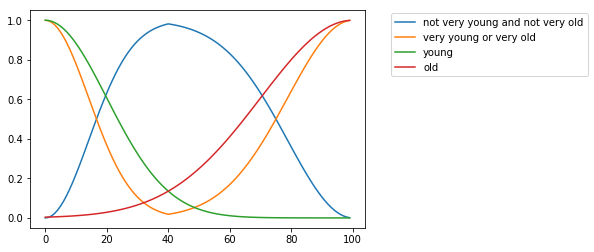

In [65]:
fig = plt.figure()
ax = fig.add_subplot(111)
x=np.arange(0,100,1)
mu_young = fuzz.gaussmf(x,0,20)
mu_old = fuzz.gaussmf(x,100,30)

mu_very_young = mu_young*mu_young
mu_very_old = mu_old*mu_old
mu_not_very_young = fuzz.fuzzy_not(mu_young*mu_young)
mu_not_very_old = fuzz.fuzzy_not(mu_old*mu_old)

[x,mu_1] = fuzz.fuzzy_and(x,mu_not_very_young,x,mu_not_very_old)
[x,mu_2] = fuzz.fuzzy_or(x,mu_very_young,x,mu_very_old)

ax.plot(x,mu_1,label='not very young and not very old')
ax.plot(x,mu_2,label='very young or very old')

# ax.plot(x,mu_very_young, label='very young')
# ax.plot(x,mu_very_old, label='very old')
# ax.plot(x,mu_not_very_young, label='not very young')
# ax.plot(x,mu_not_very_old, label='not very old')
ax.plot(x,mu_young, label='young')
ax.plot(x,mu_old, label='old')
plt.legend(loc='upper right',\
           bbox_to_anchor=(1.68, 1.01),ncol=1)
plt.show()

#### Problem 5 (Ch3-8):   
Suppose that the MFs for fuzzy set A and B are a trapezoidal MF $\text{trapezoid}(x;a,b,c,d)$ and a two-sided $\pi$-MF $ts$-$\pi(x;a,b,c,d)$ [Equation (2.68)], respectively. Show that INT($A$)=$B$.

**Solution:**
$$\begin{equation}
\begin{array}{lCL}
\mu_A(x) &=& trapezoid(x;a,b,c,d) \\
  &=& \text{max} \left( \text{min} \left( \frac{x-a}{b-a}, 1, \frac{d-x}{d-c} \right), 0 \right) \\
  &=& \left\{
        \begin{array}{}
        0,  & x \leq a \\
        \frac{x-a}{b-a}, & a\leq x \leq b \\
        1, & b \leq x \leq c \\
        \frac{d-x}{d-c}, & c \leq x \leq d \\
        0, & d \leq x
        \end{array}
       \right. \\ 
\mu_B(x)  &=& ts-\pi(x;a,b,c,d) \\
  &=& \left\{
        \begin{array}{}
        0,  & x \leq a \\
        S(x,a,b), & a\leq x \leq b \\
        1, & b \leq x \leq c \\
        Z(x,c,d), & c \leq x \leq d \\
        0, & d \leq x
        \end{array}
       \right.
\end{array}
\end{equation}$$     
- When $x \leq a$ or $d \leq x$      
Due to $\mu_A(x) = 0$,
$$\text{INT}(A) = 2A^2 = 0$$    
- When $ a\leq x \leq b$    
$$\begin{equation}
\begin{array}{}
\text{INT}(A) &=&  
\left\{
\begin{array}{cl}
2A^2 &=& 2 \left( \frac{x-a}{b-a} \right)^2 &,  a\leq x \leq \frac{a+b}{2}\\
\lnot 2(\lnot A)^2 &=& 1-2 \left( 1- \frac{x-a}{b-a} \right)^2 = 1-2 \left( \frac{b-x}{b-a} \right)^2 &,  \frac{a+b}{2}\leq x \leq b
\end{array}
\right. \\
&=& S(x;a,b)
\end{array}
\end{equation}$$
- When $b\leq x \leq c$     
Due to $\mu_A(x) = 1$,
$$\text{INT}(A) = \lnot 2(\lnot A)^2 = 1-2(1-1)^2 =1$$   
- When $c\leq x \leq d$     
$$\begin{equation}
\begin{array}{}
\text{INT}(A) &=&  
\left\{
\begin{array}{cl}
2A^2 &=& 2 \left( \frac{d-x}{d-c} \right)^2 &,  c\leq x \leq \frac{c+d}{2}\\
\lnot 2(\lnot A)^2 &=& 1-2 \left( 1- \frac{d-x}{d-c} \right)^2 = 1-2 \left( \frac{x-c}{d-c} \right)^2 &, \frac{c+d}{2}\leq x \leq d
\end{array}
\right. \\
&=& 1-S(x;c,d) \\
&=& Z(x;c,d) 
\end{array}
\end{equation}$$   
Consequently
$$\text{INT}(A) = B$$